In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BECF8E9208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BED0EBDD68>]], dtype=object)

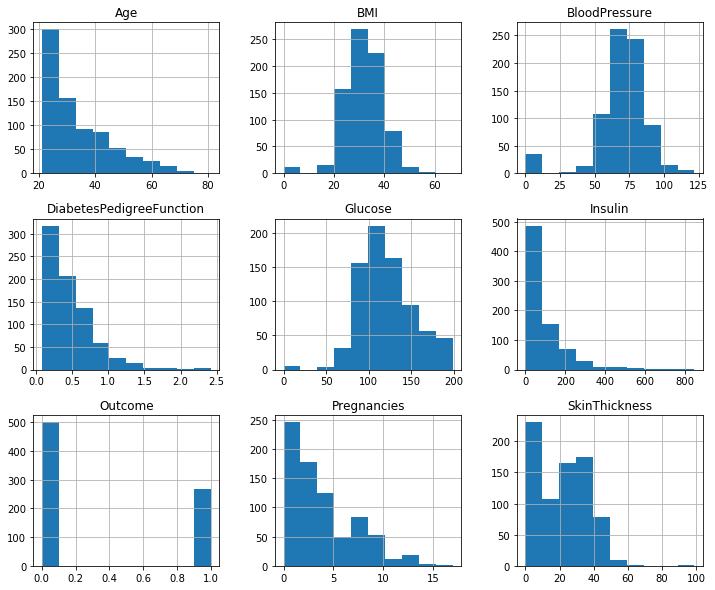

In [4]:
df.hist(figsize=(12,10))

In [5]:
#plotted histogram for each feature to know more about features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [11]:
sc = StandardScaler()

In [12]:
X=sc.fit_transform(df.drop('Outcome',axis=1))

In [13]:
y=df['Outcome'].values

In [14]:
X


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ..., 
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1,

In [17]:
y.shape


(768,)

In [18]:
y_cat=to_categorical(y)

In [19]:
y_cat

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [21]:
y_cat.shape

(768, 2)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,random_state=22,test_size=0.2)

In [24]:
from keras.models import Sequential

In [26]:
from keras.layers import Dense
from keras.optimizers import Adam

In [27]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [28]:
model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, epochs=20, verbose=2, validation_split=0.1)


Train on 552 samples, validate on 62 samples
Epoch 1/20
0s - loss: 0.6032 - acc: 0.6957 - val_loss: 0.5050 - val_acc: 0.7742
Epoch 2/20
0s - loss: 0.4920 - acc: 0.7518 - val_loss: 0.5462 - val_acc: 0.7581
Epoch 3/20
0s - loss: 0.4626 - acc: 0.7772 - val_loss: 0.5806 - val_acc: 0.7419
Epoch 4/20
0s - loss: 0.4508 - acc: 0.7826 - val_loss: 0.5288 - val_acc: 0.7419
Epoch 5/20
0s - loss: 0.4347 - acc: 0.7899 - val_loss: 0.6161 - val_acc: 0.7742
Epoch 6/20
0s - loss: 0.4479 - acc: 0.7736 - val_loss: 0.6275 - val_acc: 0.7419
Epoch 7/20
0s - loss: 0.4440 - acc: 0.7862 - val_loss: 0.5376 - val_acc: 0.7258
Epoch 8/20
0s - loss: 0.4535 - acc: 0.7536 - val_loss: 0.6436 - val_acc: 0.7419
Epoch 9/20
0s - loss: 0.4309 - acc: 0.7844 - val_loss: 0.5212 - val_acc: 0.7581
Epoch 10/20
0s - loss: 0.4119 - acc: 0.8098 - val_loss: 0.5699 - val_acc: 0.7581
Epoch 11/20
0s - loss: 0.4229 - acc: 0.7971 - val_loss: 0.7707 - val_acc: 0.7581
Epoch 12/20
0s - loss: 0.4320 - acc: 0.7772 - val_loss: 0.7198 - val_acc:

In [31]:
y_pred = model.predict(X_test)


In [32]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
pd.Series(y_test_class).value_counts() / len(y_test_class)


0    0.649351
1    0.350649
dtype: float64

In [35]:
accuracy_score(y_test_class, y_pred_class)

0.72727272727272729

In [36]:
print(classification_report(y_test_class, y_pred_class))


             precision    recall  f1-score   support

          0       0.77      0.83      0.80       100
          1       0.63      0.54      0.58        54

avg / total       0.72      0.73      0.72       154



In [37]:
confusion_matrix(y_test_class, y_pred_class)


array([[83, 17],
       [25, 29]])

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, y_train[:, 1])
    y_pred = mod.predict(X_test)
    print("="*80)
    print(mod)
    print("-"*80)
    print("Accuracy score: {:0.3}".format(accuracy_score(y_test_class,
                                                         y_pred)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Accuracy score: 0.688
Confusion Matrix:
[[89 11]
 [37 17]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Accuracy score: 0.721
Confusion Matrix:
[[89 11]
 [32 22]]

GaussianNB(priors=None)
--------------------------------------------------------------------------------
Accura